# Portfólio Fundamentos da Inteligência Artificial 

### - Desenvolvimento de uma Rede Neural Artificial Simples - Porta Lógica XOR

- Importação das Bibliotecas Necessárias

In [4]:
# Bibliotecas Necessárias
import numpy as np # Criação da Rede Neural Simples
import matplotlib.pyplot as plt # Impressão do gráfico de erros da Rede Neural

- Definição da função Sigmoide a derivada

In [6]:
# Definição da Função Sigmoide utilizada tanto para a ativação quanto derivada para o cálculo do gradiente.
def funcao_sigmoide(x):
    return 1 / (1 + np.exp(-x))

In [7]:
# Derivada da função sigmoide
def derivada_sigmoide(x):
    return x * (1 - x)

- Definição das Entradas e Saídas:

In [9]:
# Definição da Entrada X
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

In [10]:
# Definição da saída y
y = np.array([[0], [1], [1], [0]])

- Inicialização dos Pesos

In [12]:
np.random.seed(1) # definindo uma semente para o gerador de números aleatórios
cam_neuronios_ent = X.shape[1]  # Qtde de neurônios na camada de entrada (2)
neuronios_ocultos = 4  # Qtde. de neurônios na camada oculta
neuronios_saida = 1  # Qtde. de neurônios na camada de saída
# Inicializa os pesos das sinapses da camada de entrada com valores aleatórios uniformemente distribuídos
pesos_ent_oculta = np.random.uniform(size=(cam_neuronios_ent, neuronios_ocultos))
# Inicializa os pesos das sinapses da camada de saída com valores aleatórios uniformemente distribuídos
pesos_sai_oculta = np.random.uniform(size=(neuronios_ocultos, neuronios_saida))

- Treinamento da Rede Neural:

In [14]:
# Loop Treinamento da Rede Neural
iteracoes = 10000 # Qtde. de iterações solicitadas na proposta
lista_erros = [] # Criando lista de erros para exibir gráfico

for _ in range(iteracoes):
    # propagação para frente calculando as saídas
    ativ_cam_oculta = np.dot(X, pesos_ent_oculta)
    sai_cam_oculta = funcao_sigmoide(ativ_cam_oculta)
    
    ativ_cam_saida = np.dot(sai_cam_oculta, pesos_sai_oculta)
    saida_prevista = funcao_sigmoide(ativ_cam_saida)
    
    # Cálculo do erro
    erro = y - saida_prevista
    lista_erros.append(np.mean(np.abs(erro)))  # Armazena o erro médio absoluto
    
    # Calcule o delta (ajuste dos pesos) utilizando a derivada da função sigmoide
    ajusta_sai_prev = erro * derivada_sigmoide(saida_prevista)
    erro_cam_oculta = ajusta_sai_prev.dot(pesos_sai_oculta.T)
    ajusta_cam_oculta = erro_cam_oculta * derivada_sigmoide(sai_cam_oculta)
    
    # Atualize os pesos da sinapse
    pesos_sai_oculta += sai_cam_oculta.T.dot(ajusta_sai_prev)
    pesos_ent_oculta += X.T.dot(ajusta_cam_oculta)

- Exibição dos resultados

In [16]:
# Exibição dos Resultados
previsoes = funcao_sigmoide(np.dot(funcao_sigmoide(np.dot(X, pesos_ent_oculta)), pesos_sai_oculta))
print("Saídas previstas:\n", previsoes)

Saídas previstas:
 [[0.01698737]
 [0.98275059]
 [0.98429484]
 [0.01631357]]


- Exibindo o gráfico de erros no treinamento

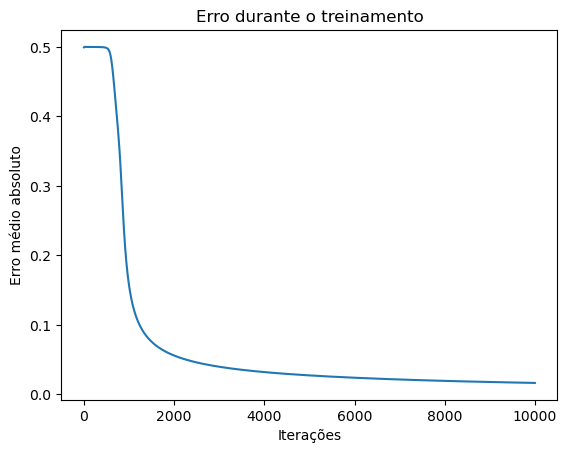

In [18]:
# Exibir o gráfico do erro
plt.plot(lista_erros)
plt.title('Erro durante o treinamento')
plt.xlabel('Iterações')
plt.ylabel('Erro médio absoluto')
plt.show()